In [1]:
import numpy as np
import pandas as pd

# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format='svg'

#Increasse the default plot size
from pylab import rcParams
rcParams['figure.figsize']= 5,4

In [2]:
df=pd.read_csv('Visual Data Analysis with Pandas/telecom_churn.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


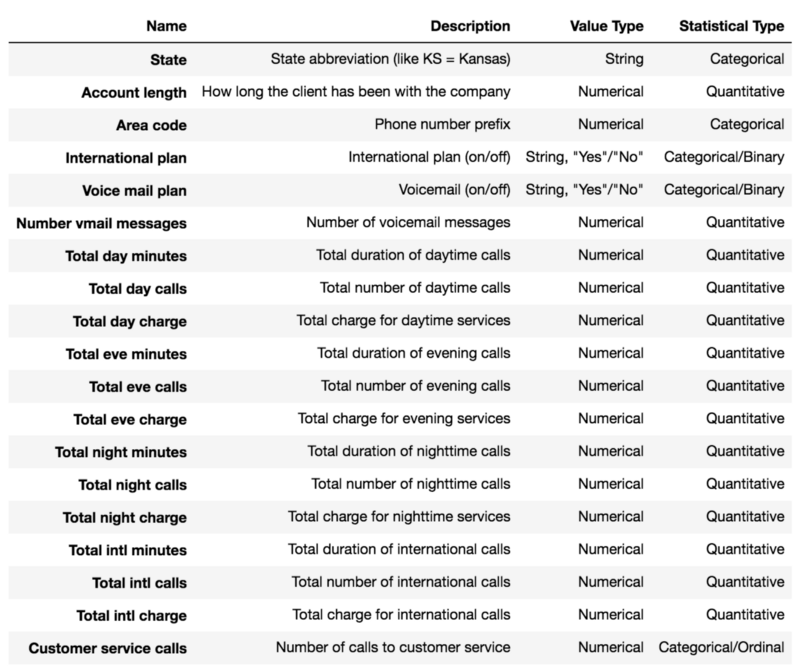

In [4]:
from PIL import Image
img=Image.open('Visual Data Analysis/image.png')
img

In [5]:
#Univariate visualization
#Univariate analysis looks at one variable at a time. 
#When we analyze a feature independently, we are usually mostly #
#interested in the distribution of its values and ignore the other variables in the dataset.

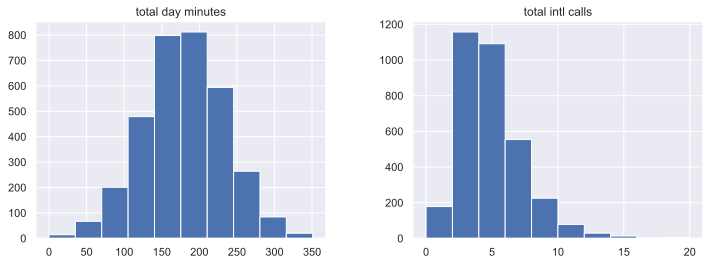

In [6]:
#histogram plots
#plot its histogram using the DataFrame's method hist()
features=['total day minutes','total intl calls']
df[features].hist(figsize=(12,4));
#The shape of the histogram may contain clues about 
#the underlying distribution type: Gaussian, exponential etc. 
#You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies.

In [7]:
#In the above plot, we see that the variable Total day minutes 
#is normally distributed, while Total intl calls is prominently 
#skewed right (its tail is longer on the right).

In [8]:
#another, often clearer, way to grasp the distribution: 
#density plots or, more formally, Kernel Density Plots. They can be considered a smoothed version of the histogram. 

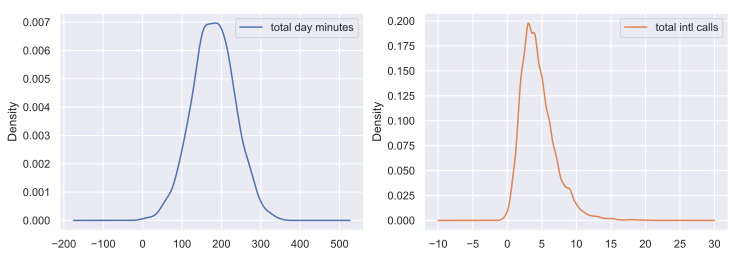

In [9]:
df[features].plot(kind='density',subplots=True,layout=(1,2),sharex=False,figsize=(12,4));

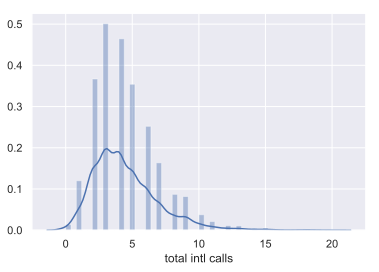

In [10]:
#plot a distribution of observations with seaborn's distplot()
sns.distplot(df['total intl calls']);

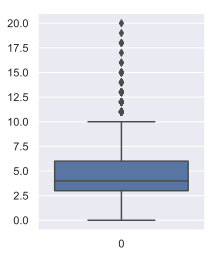

In [11]:
#Box plot
_,ax=plt.subplots(figsize=(3,4))
sns.boxplot(data=df['total intl calls'],ax=ax);

Let’s see how to interpret a box plot. Its components are a box (obviously, this is why it is called a box plot), the so-called whiskers, and a number of individual points (outliers).
The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25th (Q1) and 75th (Q3) percentiles. The vertical line inside the box marks the median (50%) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval (Q1−1.5⋅IQR, Q3+1.5⋅IQR), where IQR=Q3−Q1 is the interquartile range.

Outliers that fall out of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

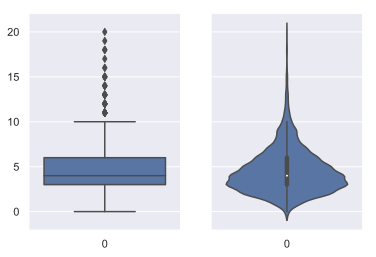

In [12]:
_,ax=plt.subplots(1,2,sharey=True,figsize=(6,4))
sns.boxplot(data=df['total intl calls'],ax=ax[0])
sns.violinplot(data=df['total intl calls'],ax=ax[1]);

In [13]:
df[features].describe()

,total day minutes,total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [14]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In our case, the data is not balanced; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following articles, this fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionaly penalize our model errors in predicting the minority “Churn” class.

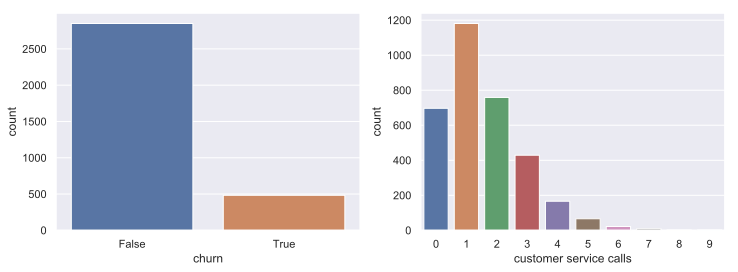

In [15]:
_,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(x='churn',data=df,ax=ax[0])
sns.countplot(x='customer service calls',data=df,ax=ax[1]);

Let’s look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

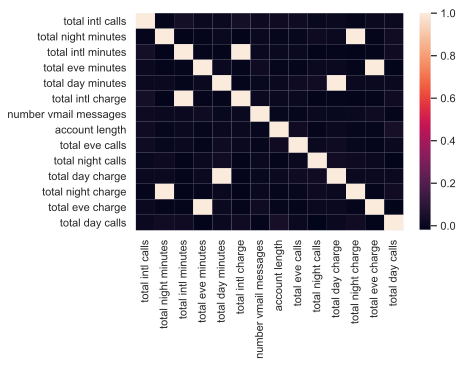

In [16]:
numerical=list(set(df.columns)-set(['state','international plan','voice mail plan',
                                    'area code','churn','customer service calls']))
corr=df[numerical].corr()
sns.heatmap(corr);

In [17]:
numerical=list(set(numerical)-set(['total day charge','total eve charge','total night charge','total intl charge','phone number']))

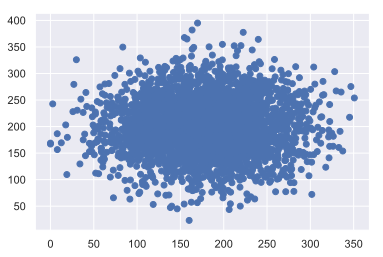

In [18]:
#scatter plot
plt.scatter(df['total day minutes'],df['total night minutes']);

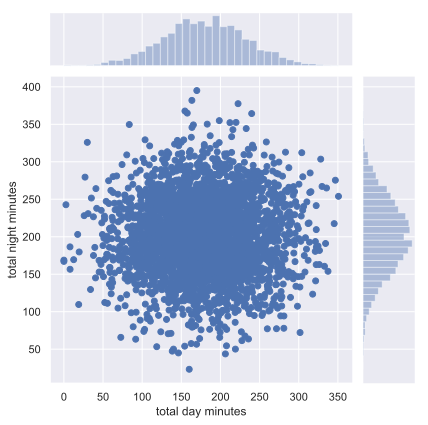

In [19]:
#scatter plot with the seaborn library
sns.jointplot(x='total day minutes',y='total night minutes',data=df,kind='scatter');

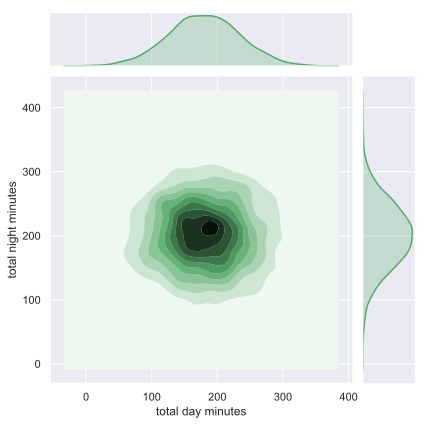

In [20]:
#scatter plot with the seaborn library
sns.jointplot(x='total day minutes',y='total night minutes',data=df,kind='kde',color='g');

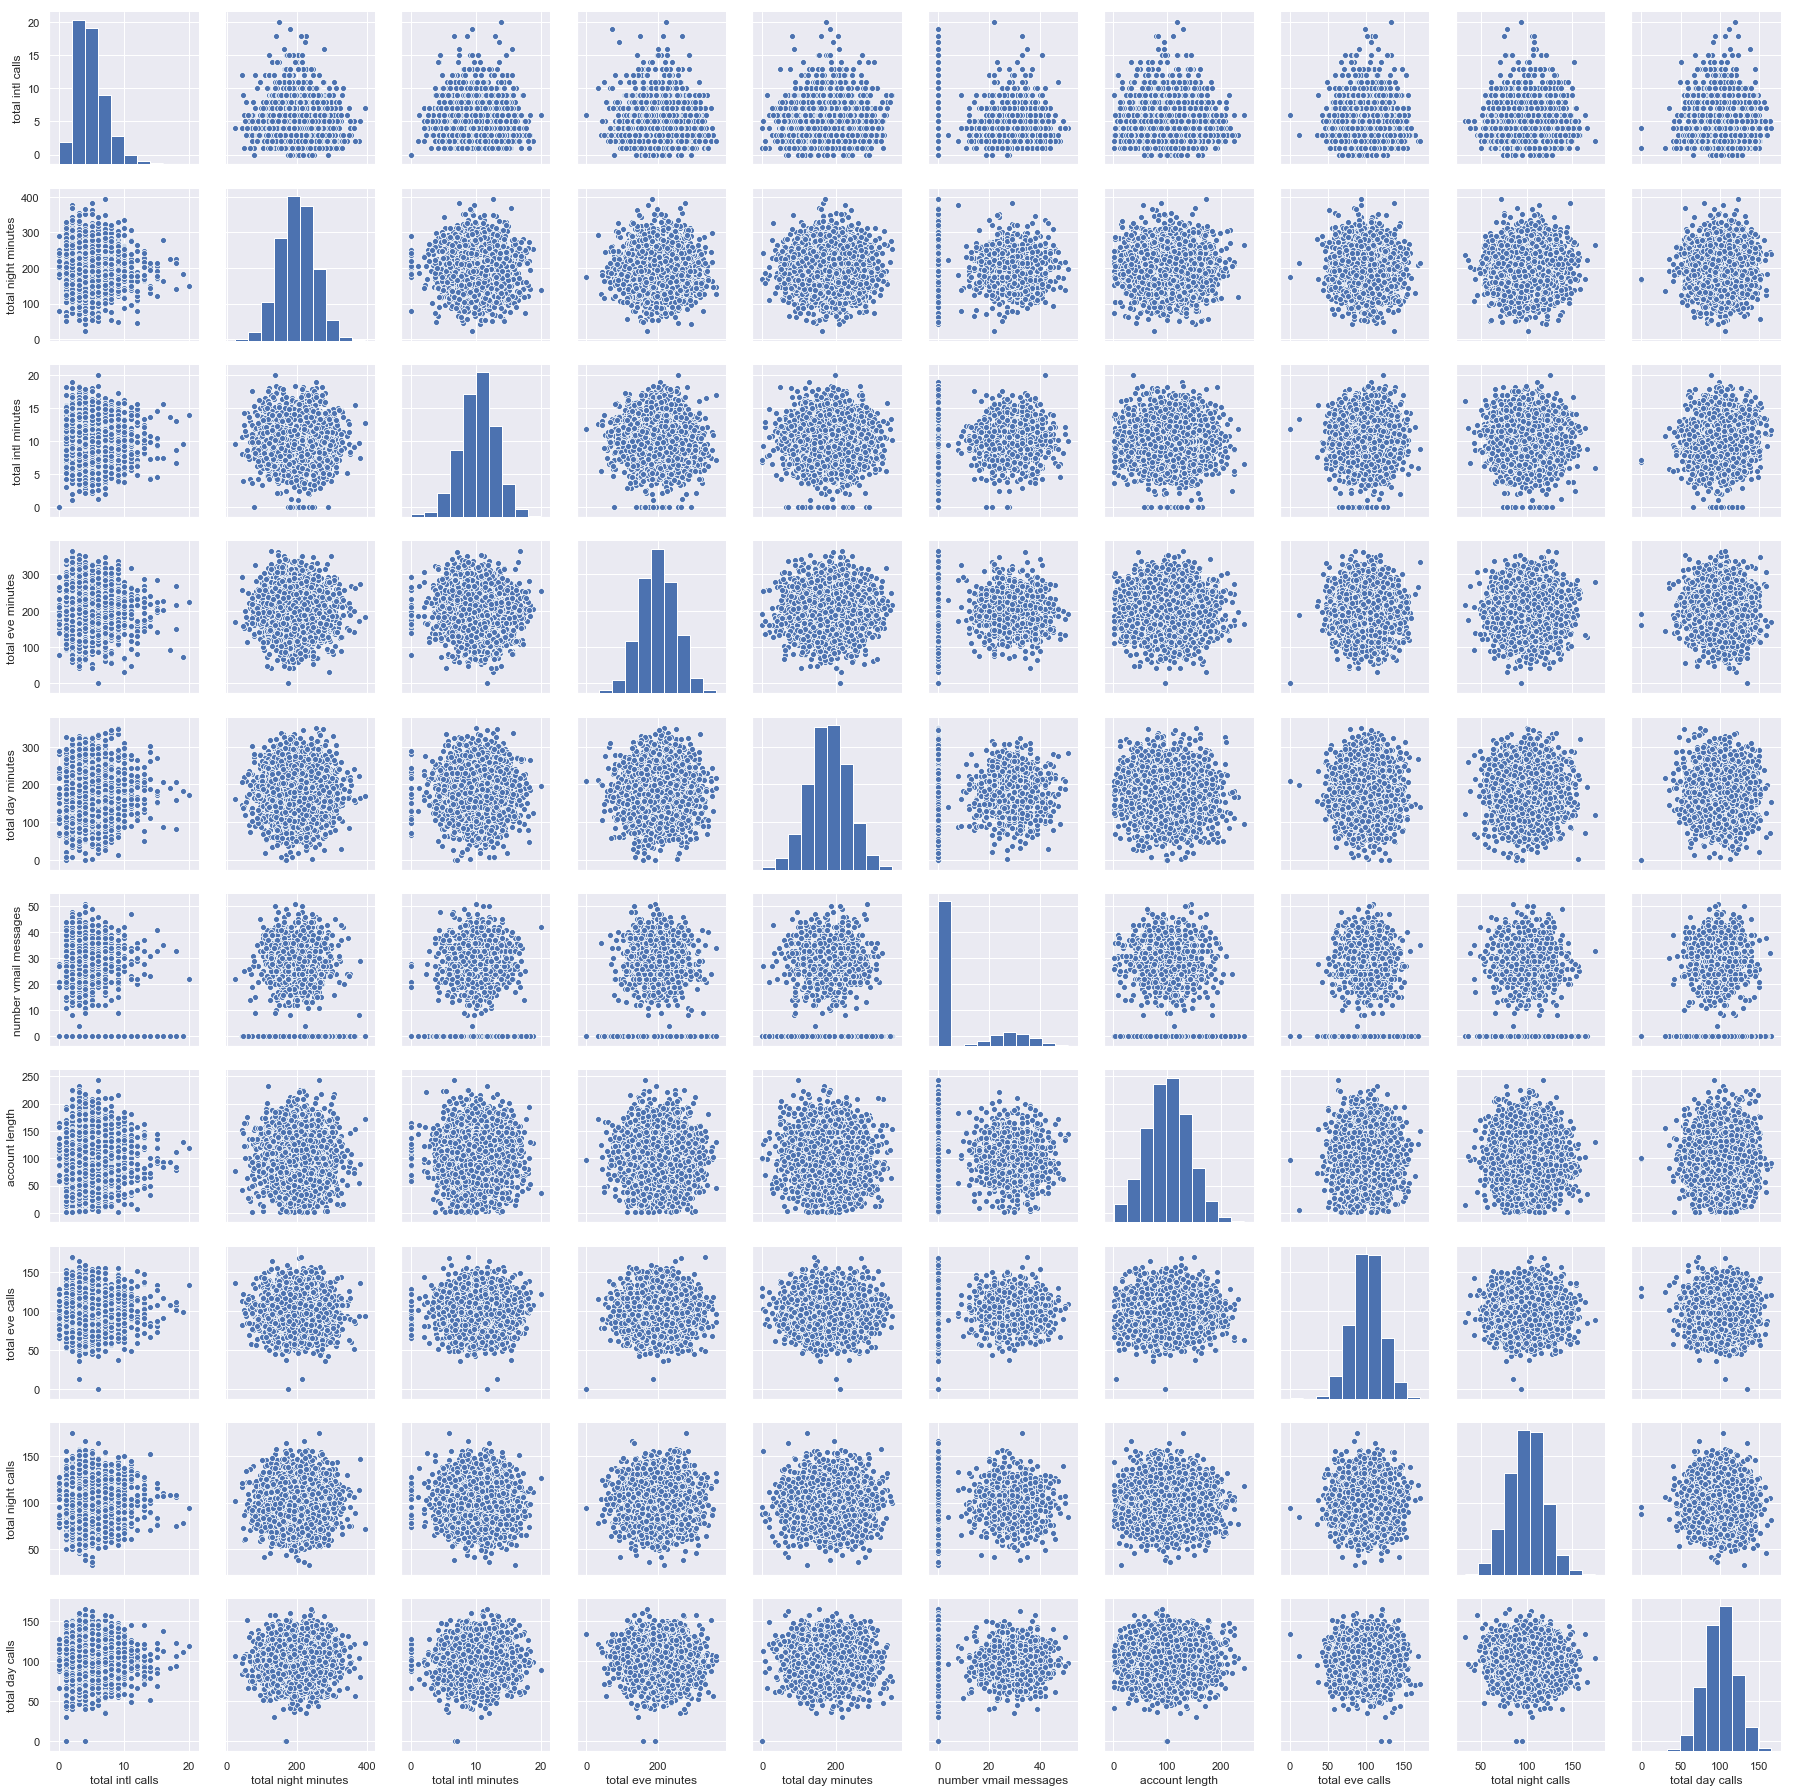

In [21]:
# pairplot may become very slow with the SVG format
%config InlineBackend.figure_format='png'
sns.pairplot(df[numerical]);

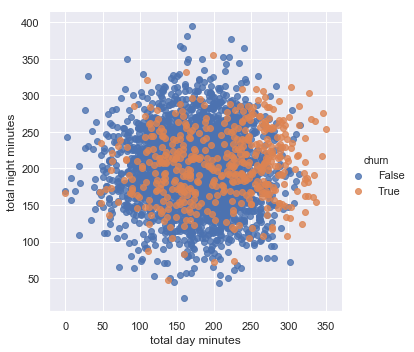

In [22]:
sns.lmplot('total day minutes','total night minutes',hue='churn',data=df,fit_reg=False);

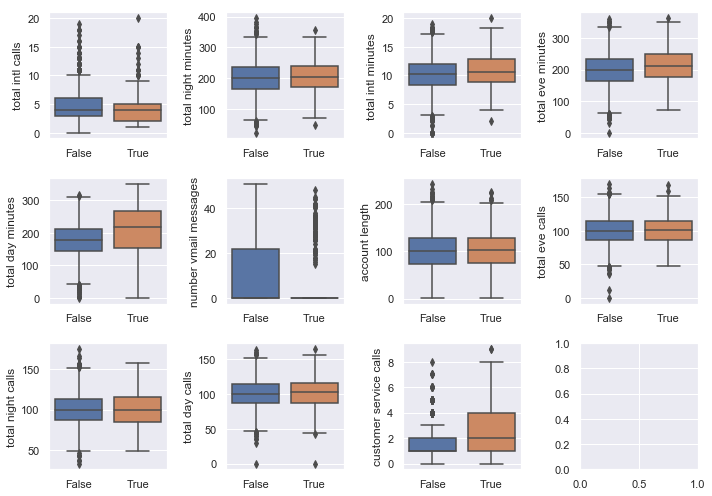

In [23]:
# Sometimes you can analyze an ordinal variable as numerical one
numerical.append('customer service calls') 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax=axes[int(idx/4),idx%4]
    sns.boxplot(x='churn',y=feat,data=df,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

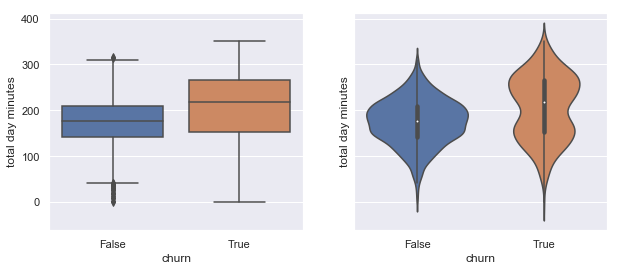

In [24]:
_,axes=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,4))
sns.boxplot(x='churn', y='total day minutes',data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1]);

An interesting observation: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

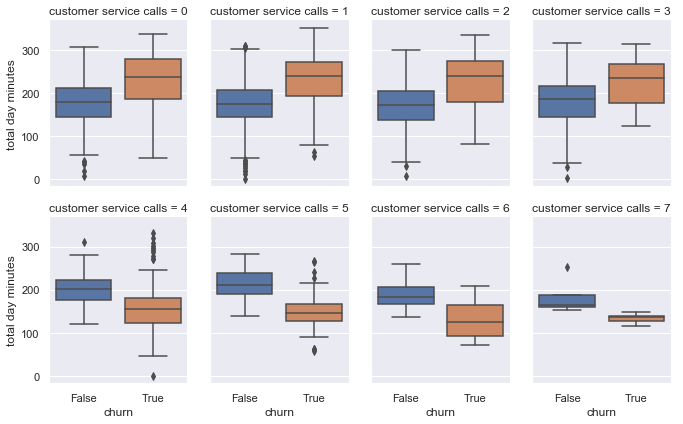

In [25]:
#When we want to analyze a quantitative variable in two categorical dimensions at once, 
#there is a suitable function for this in the seaborn library called catplot()
sns.catplot(x='churn',y='total day minutes',col='customer service calls',
               data=df[df['customer service calls']<8],kind='box',col_wrap=4,
              height=3,aspect=.8);

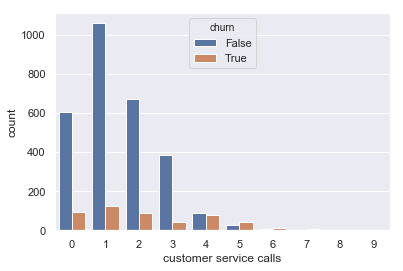

In [26]:
#the variable Customer service calls has few unique values and, thus, can be considered either numerical or ordinal.
sns.countplot(x='customer service calls',hue='churn',data=df);

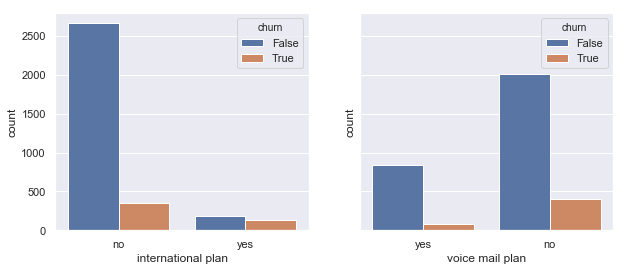

In [27]:
_,axes=plt.subplots(1,2,sharey=True,figsize=(10,4))
sns.countplot(x='international plan',hue='churn',data=df,ax=axes[0]);
sns.countplot(x='voice mail plan',hue='churn',data=df,ax=axes[1]);

In [28]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


Naive approach

We have been looking at different facets of our dataset by guessing interesting features and selecting a small number of them at a time for visualization. We have only delt with two to three variables at once and were easily able to observe the structure and relationships in data. But, what if we want to display all the features and still be able to interpret the resulting visualization?

We could use hist() or create a scatterplot matrix with pairplot() for the whole dataset to look at all of our features simultaneously. But, when the number of features is high enough, this kind of visual analysis quickly becomes slow and inefficient. Besides, we would still be analyzing our variables in a pairwise fashion, not all at once.

In [29]:
#T-SNE representation 
#projection for a high-dimensional feature space onto a plane (or a 3D hyperplane, but it is almost always 2D)
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [30]:
X=df.drop(['churn','state','phone number'],axis=1)
X['international plan']=X['international plan'].map({'yes':1,'no':0})
X['voice mail plan']=X['voice mail plan'].map({'yes':1,'no':0})

In [35]:
#We need to normalize the data first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

Wall time: 44.9 s


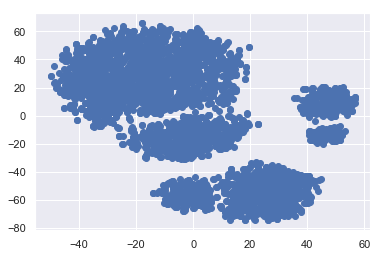

In [33]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1])

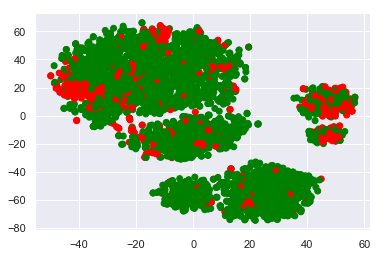

In [34]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1],c=df['churn'].map({False:'green',True:'red'}));